# BERT base-uncased
## Usando os 2 melhores padrões do HypeNet-train

### SEP usa esses 2 e faz uma permutação gerando 15 padrões 2 a 2.

### DOT usa esses 2 e faz uma permutação de tamnho 2 até 2 gerando 2 padrões separado com um ponto.
> Suponha o par (3,2) (abacate, fruta) e os padrões (é um tipo de) e (é um)
> SEP:
- [CLS] [MASK] ca te é um tipo de fru ta [SEP] aba ca te é um fru ta [SEP]
- [CLS] aba [MASK] te é um tipo de fru ta [SEP] aba ca te é um fru ta [SEP]
- [CLS] aba ca [MASK] é um tipo de fru ta [SEP] aba ca te é um fru ta [SEP]
- [CLS] aba ca te é um tipo de [MASK] ta [SEP] aba ca te é um fru ta [SEP]
- [CLS] aba ca te é um tipo de fru [MASK] [SEP] aba ca te é um fru ta [SEP]
- [CLS] aba ca te é um tipo de fru ta [SEP] [MASK] ca te é um fru ta [SEP]
- [CLS] aba ca te é um tipo de fru ta [SEP] aba [MASK] te é um fru ta [SEP]
- [CLS] aba ca te é um tipo de fru ta [SEP] aba ca [MASK] é um fru ta [SEP]
- [CLS] aba ca te é um tipo de fru ta [SEP] aba ca te é um [MASK] ta [SEP]
- [CLS] aba ca te é um tipo de fru ta [SEP] aba ca te é um fru [MASK] [SEP]


- Os primeiros gráficos mostram o balanceamento de cada dataset.
  - % dos pares True para cada tamanho de subtoken

  - Quantidade total de pares para cada tamanho de subtoken

- último gŕafico mostra AP dos datasets.


> OBS: inconsistência nos datasets turney2014

In [1]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import nb_utils
import itertools

sns.set(style="whitegrid")
plt.clf()


# path_json_normal = "../../aaaaaaaa/bert-base-uncased_bert_score_2020-11-12_17:28:09"
# path_json_dot = "../../aaaaaaaa/bert-base-uncased_bert_score_dot_comb_2020-11-12_17:29:58"
# path_json_sep = "../../aaaaaaaa/bert-base-uncased_bert_score_sep_comb_2020-11-12_17:29:11"

path_json_normal = "../../en-model/bert-base-uncased_bert_score_normal_2020-11-12_15:13:01"
path_json_dot = "../../en-model/bert-base-uncased_bert_score_dot_comb_2020-11-12_14:48:06"
path_json_sep = "../../en-model/bert-base-uncased_bert_score_sep_comb_2020-11-12_14:48:36"

dfs = {}
pattern_unique = {}
filename = ""
for filename in os.listdir(path_json_normal):
    if os.path.isfile(os.path.join(path_json_normal, filename)) and filename.endswith(".json"):
        df = nb_utils.create_dataframe(json.load(open(os.path.join(path_json_normal, filename))), combination=False, separator="\t")
        df['tipo'] = 'normal'
        dfs[filename + " normal"] = df
pattern_unique['normal'] = df['pattern'].unique().tolist()
for filename in os.listdir(path_json_dot):
    if os.path.isfile(os.path.join(path_json_dot, filename)) and filename.endswith(".json"):
        df = nb_utils.create_dataframe(json.load(open(os.path.join(path_json_dot, filename))), combination=False, separator="\t")
        df['tipo'] = 'dot'
        dfs[filename + " dot"] = df
pattern_unique['dot'] = df['pattern'].unique().tolist()
for filename in os.listdir(path_json_sep):
    if os.path.isfile(os.path.join(path_json_sep, filename)) and filename.endswith(".json"):
        df = nb_utils.create_dataframe(json.load(open(os.path.join(path_json_sep, filename))), combination=True, separator="\t")
        df['tipo'] = 'sep'
        dfs[filename + " sep"] = df
pattern_unique['sep'] = df['pattern'].unique().tolist()

len_total_unique = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

df_ratios = []
for dataset_name in dfs.keys():
    print(dataset_name)
    dname, type_dataset = dataset_name.split()
    df_ratio = nb_utils.balanceamento(dfs[dataset_name], len_size=len_total_unique, patterns=pattern_unique[type_dataset])
    df_ratio['dataset'] = dname
    df_ratio['tipo'] = type_dataset
    df_ratios.append(df_ratio)
df_ratios = pd.concat(df_ratios, ignore_index=True)

for dataset_name, df in dfs.items():
    type_dataset = dataset_name.split()[-1]
    dfs[dataset_name] = nb_utils.logsumexp_normalization(df, len_list=len_total_unique, pattern_list=pattern_unique[type_dataset])

kotlerman2010.json normal
Balanceamento: [1, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
levy2014.json normal
Balanceamento: [1, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
turney2014.json normal
Balanceamento: [1, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
baroni2012.json normal
Balanceamento: [1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
EVALution.json normal
Balanceamento: [1, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
LenciBenotto.json normal
Balanceamento: [1, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] não está no dataframe!
Weeds.json normal
Balanceamento: [1, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 2

<Figure size 432x288 with 0 Axes>

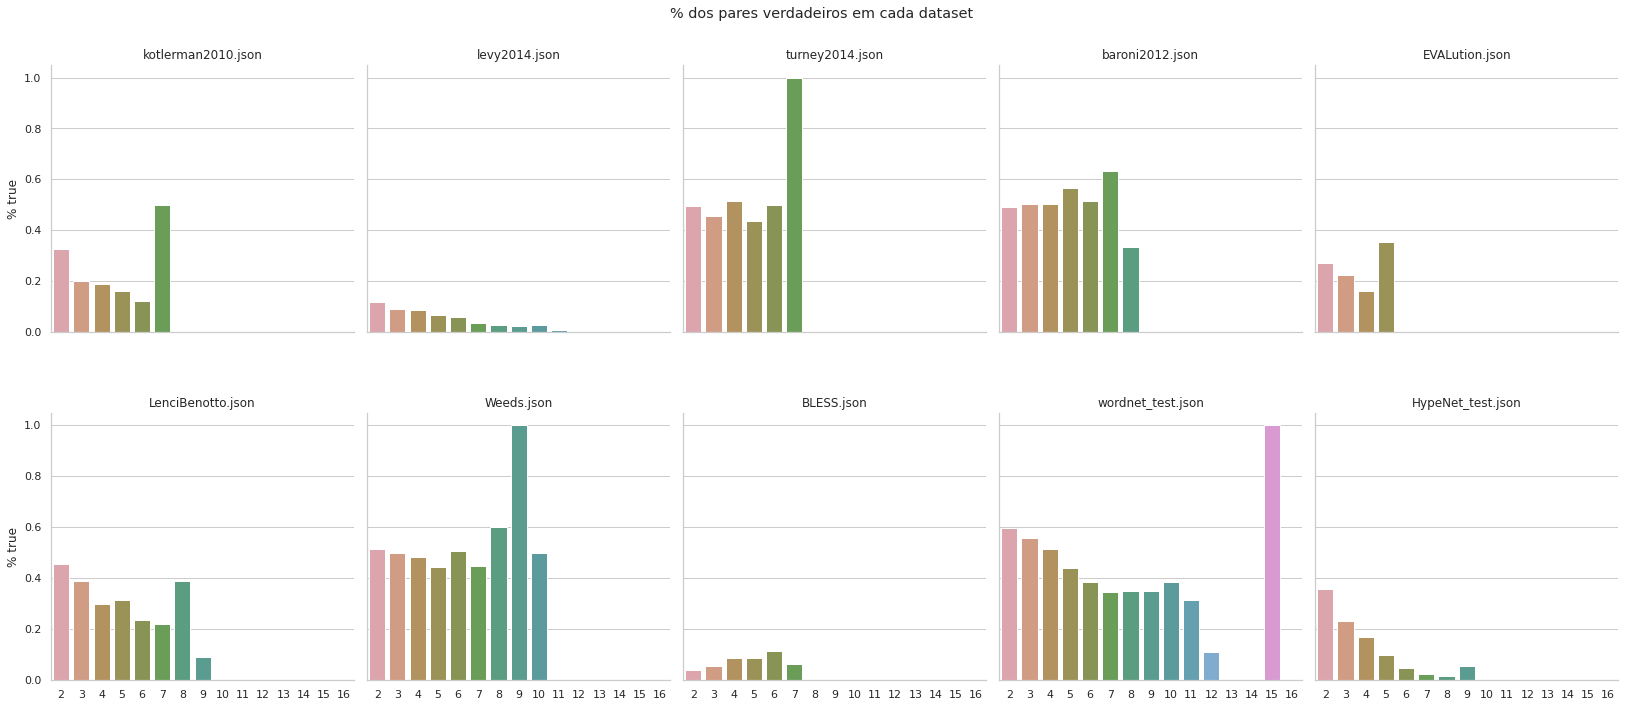

In [2]:
df_ratios['dataset_tipo'] = df_ratios['dataset'] + " " + df_ratios['tipo']
df_plot_lensubtoken = df_ratios[df_ratios['tipo'] == 'normal']
# % dos pares True por tamanho de subtoken
g = sns.catplot(x="len_total", y="ratio", col="dataset", col_wrap=5,
                data=df_plot_lensubtoken, saturation=.5,
                kind="bar", ci=None, aspect=.9)
(g.set_axis_labels("", "% true")
#   .set_xticklabels(["Men", "Women", "Children"])
  .set_titles("{col_name}")
  .despine(left=False))
plt.subplots_adjust(top=0.9, hspace=0.3)
_ = g.fig.suptitle('% dos pares verdadeiros em cada dataset')

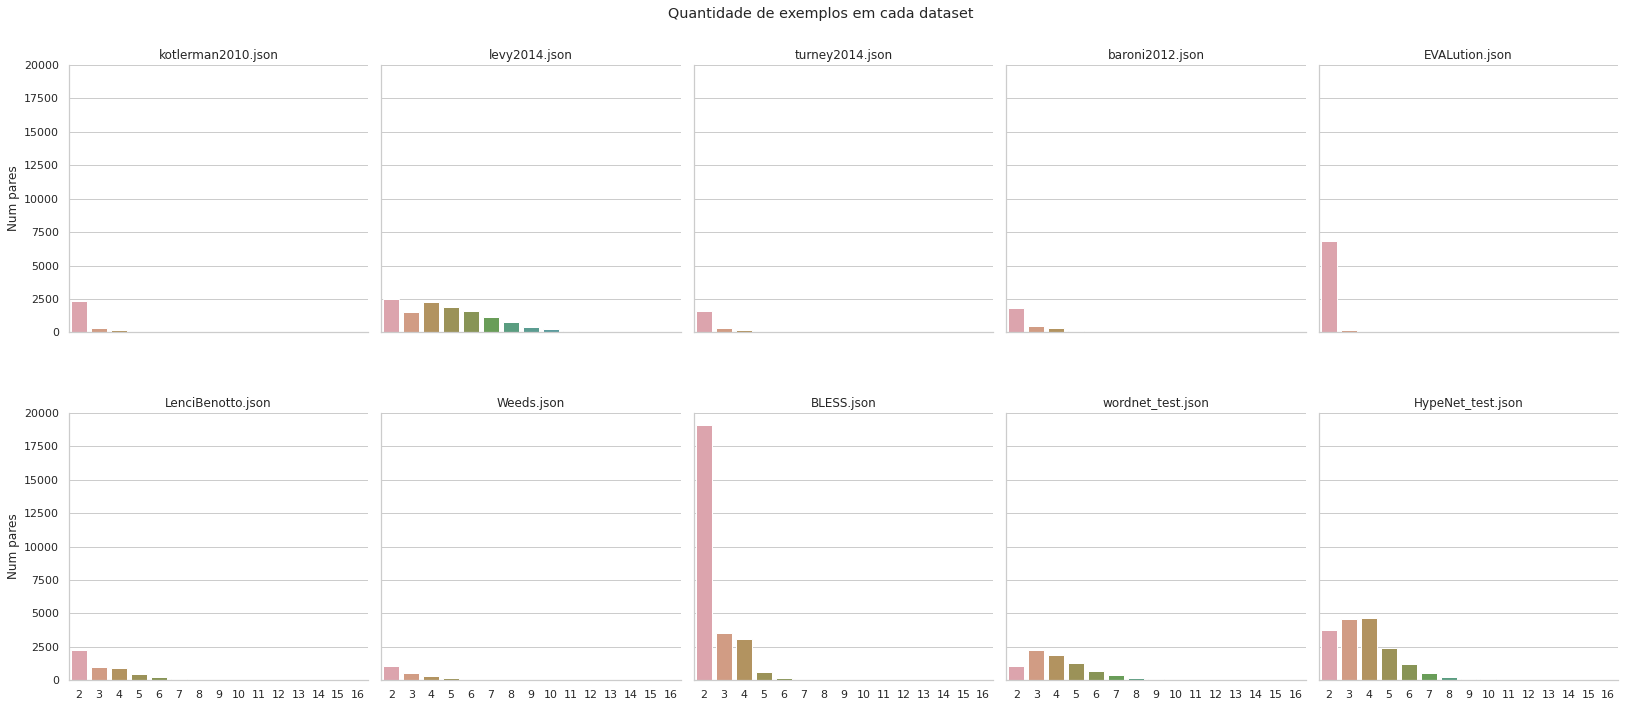

In [3]:
# Quantidade de pares por tamanho de subtoken
df_ratios['total'] = df_ratios['true'] + df_ratios['false']
df_plot_lensubtoken = df_ratios[df_ratios['tipo'] == 'normal']

g = sns.catplot(x="len_total", y="total", col="dataset", col_wrap=5,
                data=df_plot_lensubtoken, saturation=.5,
                kind="bar", ci=None, aspect=.9)
(g.set_axis_labels("", "Num pares")
#   .set_xticklabels(["Men", "Women", "Children"])
  .set_titles("{col_name}")
  # .set(ylim=(0, 1))
  .despine(left=False))
plt.subplots_adjust(top=0.9, hspace=0.3)
_ = g.fig.suptitle('Quantidade de exemplos em cada dataset')

In [4]:
del nb_utils
import nb_utils
df_en = []
dfs2 = []
best_pattern_train = nb_utils.best_pattern_HypeNet_train_logz
best_pattern_num_train = 2
# parei aqui, melhor jogar esse for detro do nb_utils
for dataset_name in dfs.keys():
    dname, type_dataset = dataset_name.split()
    if type_dataset == 'normal':
        df_temp= nb_utils.compute_min_mean_ap_normal(dfs[dataset_name],
            pattern_list=best_pattern_train, dataset_name=dname, best_pattern_num=best_pattern_num_train)
        df_temp['tipo'] = 'normal'
        dfs2.append(df_temp)
        df_temp = nb_utils.compute_ap_bert_soma(dfs[dataset_name], pattern_list=best_pattern_train, dataset_name=dname,
                                                best_pattern_num=best_pattern_num_train, tipo=type_dataset)
        df_temp['tipo'] = "normal"
        dfs2.append(df_temp)
    elif type_dataset == 'dot':
        df_temp= nb_utils.compute_min_mean_ap_dot(dfs[dataset_name],
            pattern_list=best_pattern_train, dataset_name=dname, best_pattern_num=best_pattern_num_train)
        df_temp['tipo'] = 'dot'
        dfs2.append(df_temp)
        df_temp = nb_utils.compute_ap_bert_soma(dfs[dataset_name], pattern_list=best_pattern_train, dataset_name=dname,
                                                best_pattern_num=best_pattern_num_train, tipo=type_dataset)
        df_temp['tipo'] = "dot"
        dfs2.append(df_temp)
    elif type_dataset == 'sep':
        df_temp= nb_utils.compute_min_mean_ap_sep(dfs[dataset_name],
            pattern_list=best_pattern_train, dataset_name=dname, best_pattern_num=best_pattern_num_train)
        df_temp['tipo'] = 'sep'
        dfs2.append(df_temp)
        df_temp = nb_utils.compute_ap_bert_soma(dfs[dataset_name], pattern_list=best_pattern_train, dataset_name=dname,
                                                best_pattern_num=best_pattern_num_train, tipo=type_dataset)
        df_temp['tipo'] = "sep"
        dfs2.append(df_temp)
    else:
        raise KeyError

df_en = pd.concat(dfs2)


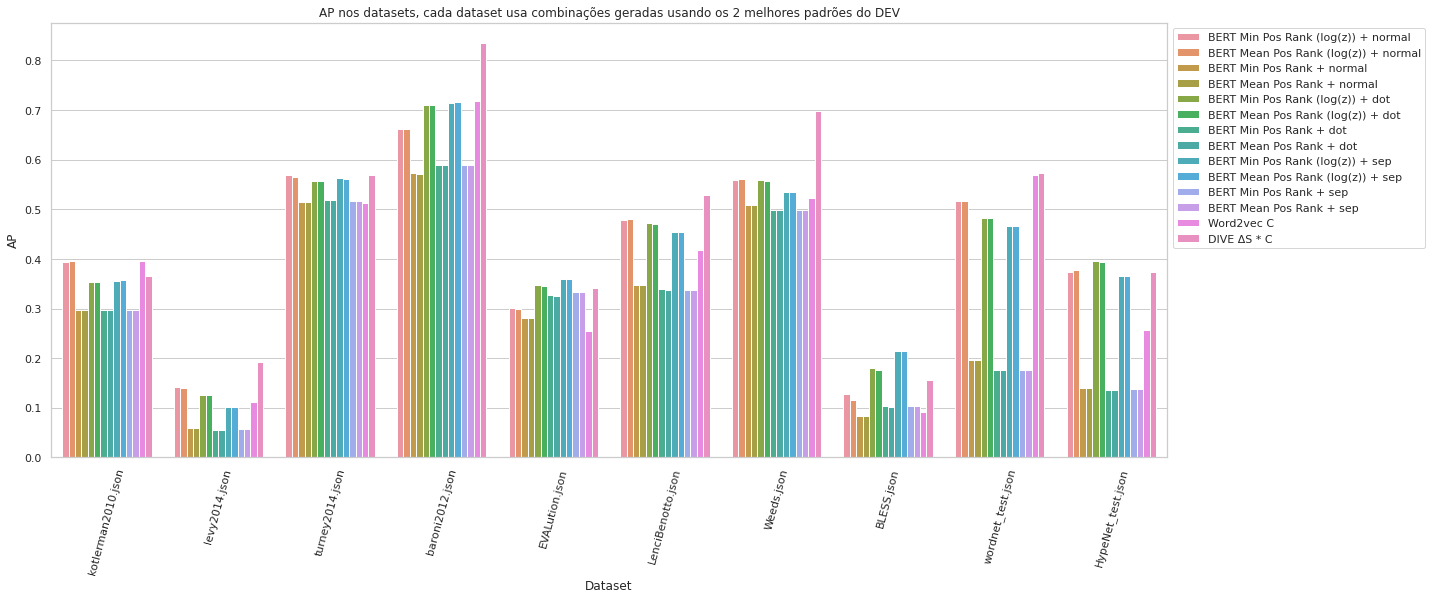

In [5]:
df_dive = nb_utils.get_df_dive()
df_dive['method_format_tipo'] = df_dive['method'].map(nb_utils.method_names)
# AP por método
df_en['method_format_tipo'] = df_en['method_format'] + " + " + df_en['tipo']
df_en = pd.concat([df_en, df_dive])
plt.figure(figsize=(20,8))
ax = sns.barplot(x='dataset' ,hue="method_format_tipo", y="AP", ci="sd",data=df_en)
ax.set(xlabel="Dataset")
ax.set_title(f"AP nos datasets, cada dataset usa combinações geradas usando os {best_pattern_num_train} melhores"
             f" padrões do DEV")
ax.legend(bbox_to_anchor=(1, 1))
_ = plt.xticks(rotation=75)

In [8]:
# print contagem
df_print = df_ratios.groupby(['dataset', 'tipo']).sum()[['true', 'false', 'total']]
df_print['ratio'] = df_print['true'] / df_print['total']
df_print

true  false  total     ratio
dataset            tipo                                
BLESS.json         dot     1337  25195  26532  0.050392
                   normal  1337  25195  26532  0.050392
                   sep     1337  25195  26532  0.050392
EVALution.json     dot     1911   5196   7107  0.268890
                   normal  1911   5196   7107  0.268890
                   sep     1911   5196   7107  0.268890
HypeNet_test.json  dot     3512  14158  17670  0.198755
                   normal  3512  14158  17670  0.198755
                   sep     3512  14158  17670  0.198755
LenciBenotto.json  dot     1933   3077   5010  0.385828
                   normal  1933   3077   5010  0.385828
                   sep     1933   3077   5010  0.385828
Weeds.json         dot     1119   1114   2233  0.501120
                   normal  1119   1114   2233  0.501120
                   sep     1119   1114   2233  0.501120
baroni2012.json    dot     1385   1385   2770  0.500000
                   normal  1385   1385   2770  0.500000
                   sep     1385   1385   2770  0.500000
kotlerman2010.json dot      880   2060   2940  0.299320
                   normal   880   2060   2940  0.299320
                   sep      880   2060   2940  0.299320
levy2014.json      dot      945  11657  12602  0.074988
                   normal   945  11657  12602  0.074988
                   sep      945  11657  12602  0.074988
turney2014.json    dot     1058   1100   2158  0.490269
                   normal  1058   1100   2158  0.490269
                   sep     1058   1100   2158  0.490269
wordnet_test.json  dot     3994   3996   7990  0.499875
                   normal  3994   3996   7990  0.499875
                   sep     3994   3996   7990  0.499875